# Model Reduction on a Linear SDE

In [2]:
include("C:\\Users\\JaredMcBride\\Desktop\\Git Stuff\\Server_scripts\\Model_Reduction_Dev.jl")
include("modgen_linearSDE.jl")

modgen_LSSM (generic function with 1 method)

In [3]:
using JLD
using PyPlot

## Generate the data 

In [4]:
F = [0.1 10; 0 -.5] # Must be stable
G = [1 0; 0 1]
R = [1 0; 0 1]
Xo = [1; 1]
t_disc = 1000
gap = 1

t_start = 0
t_stop = 1e6
h = 1

X = modgen_LSSM(t_start,t_stop,h,
    F = F, 
    G = G, 
    R = R, 
    Xo = Xo, 
    t_disc = t_disc, 
    gap = gap)

2×999000 Array{Float64,2}:
 -9.27547  16.7834   -2.64962  -0.992615  …  -18.7636    -5.58831   0.0
  3.63266  -1.21943  -2.89855   0.162635       0.677388  -0.594464  0.0

In [5]:
Psi(x) = x

@time h_wf = get_wf(X,Psi)

adjusted no. of steps from 998999 to 1000000
 58.368872 seconds (140.99 M allocations: 8.265 GiB, 9.72% gc time)


2×2×20 Array{Float64,3}:
[:, :, 1] =
  0.835866    0.0103765
 -0.00973798  1.16701

[:, :, 2] =
  0.0893247   3.31581
 -0.0670916  -0.0890073

[:, :, 3] =
 -0.225385  -1.10347
  0.011993   0.226029

...

[:, :, 18] =
  0.00100105   0.00570893
 -3.41694e-5  -0.000957696

[:, :, 19] =
 -0.000700034  -0.0117527
  0.000199987   0.000684572

[:, :, 20] =
 0.000940525   0.00447899
 2.91664e-5   -0.000990563

In [ ]:
I + h*A

In [15]:
h_wf_55 = h_wf

2×2×20 Array{Float64,3}:
[:, :, 1] =
  3.60053   3.94868
 -0.722608  0.998188

[:, :, 2] =
 -0.264498   -0.0448881
  0.0753343  -0.00421204

[:, :, 3] =
 -0.238016   -0.0461385
  0.0673531  -0.00358851

...

[:, :, 18] =
 -0.0494998  -0.0572431
  0.0133053  -0.000340153

[:, :, 19] =
 -0.0455169  -0.0565227
  0.0120879  -0.000250326

[:, :, 20] =
 -0.0417036  -0.0573286
  0.01093    -6.56656e-6

## Get reduced (reproduced) model (no noise) 

In [19]:
h_wf = h_wf_4 # _5, _55

d, N  = size(X)
nu    = size(Psi(X[:,1]),1) 
M_out = size(h_wf,3)

X_rm = zeros(d,N); X_rm[:,1:M_out] = X[:,1:M_out]

PSI = zeros(nu,N); 
for i = 1:M_out
    PSI[:,i] = Psi(X_rm[:,i])
end

for i = M_out + 1 : N
    X_rm[:,i] = sum(h_wf[:,:,k]*PSI[:,i-k] for k = 1:M_out, dims = 2)
    PSI[:,i] = Psi(X_rm[:,i])
end



2×20 Array{Float64,2}:
 -25.8263    -25.6386   -25.569     …  -25.5049    -25.6489    -25.6305
  -0.072074   -0.14603   -0.326481      -0.116571   -0.162822   -0.314123

In [21]:
data = Dict(
        "h_wf_4" => h_wf_4,
        "h_wf_5" => h_wf_5,
        "h_wf_55"=> h_wf_55,
        "A" => A,
        "σ" => σ,
        "Xo" => Xo,
        "t_disc" => t_disc,
        "gap" => gap,
        "scheme" => scheme,
        "t_start" => t_start,
        "t_stop" => t_start,
        "h" => h,
        "X_55" => X,
        "X__rm_55_h_4" => X_rm)

save("Data\\LSDE_wfs.jld",data)

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1260


In [3]:
data = load("Data\\LSDE_wfs.jld")

Dict{String,Any} with 19 entries:
  "h_wf_55"               => [3.60053 3.94868; -0.722608 0.998188]…
  "h_wf_4"                => [-45.398 7.5126; -0.351852 0.970747]…
  "h_wf_5"                => [3.11491 4.01218; -0.708957 0.997011]…
  "h"                     => 0.01
  "_creator\\JULIA_PATCH" => 0x00000000
  "t_disc"                => 1000
  "X__rm_55_h_4"          => [-25.8263 -25.6386 … NaN NaN; -0.072074 -0.14603 ……
  "t_start"               => 0
  "σ"                     => [1 0; 0 1]
  "t_stop"                => 0
  "Xo"                    => [1, 1]
  "scheme"                => "EM"
  "A"                     => [-0.1 -10.0; -0.0 -0.9]
  "_creator\\JULIA_MINOR" => 0x00000004
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "gap"                   => 1
  "_creator\\WORD_SIZE"   => 64
  "X_55"                  => [-25.8263 -25.6386 … -7.85984 -7.85726; -0.072074 …
  "_creator\\JULIA_MAJOR" => 0x00000001

### h_wf using 10^4 times

In [5]:
X_rm = data["X__rm_55_h_4"]

2×49900000 Array{Float64,2}:
 -25.8263    -25.6386   -25.569     …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
  -0.072074   -0.14603   -0.326481     NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [9]:
blup = findall(isnan,X_rm[1,:])[1]

208

In [23]:
findall(x -> x>10^6,X_rm[1,:])[1]

25

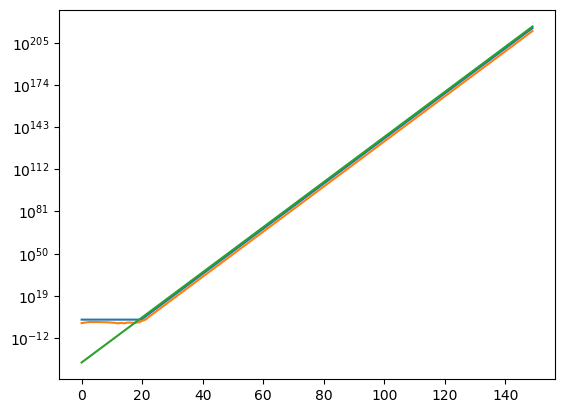

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005B0045C8>
 PyObject <matplotlib.lines.Line2D object at 0x000000005AFA0448>
 PyObject <matplotlib.lines.Line2D object at 0x000000005AFA0908>

In [28]:
semilogy([abs.(X_rm[:,1:150]') C*bas.^(1:150)])

In [26]:
bas = (abs.(X_rm[1,80]/X_rm[1,60]))^(0.05)
C = abs(X_rm[1,20])/bas^20

1.815274745778231e-32

In [35]:
bas

45.445480048391204

### h_wf using 5e5 time steps

In [36]:
Psi(x) = x
X = data["X_55"]
h_wf_55 = data["h_wf_55"]

2×2×20 Array{Float64,3}:
[:, :, 1] =
  3.60053   3.94868
 -0.722608  0.998188

[:, :, 2] =
 -0.264498   -0.0448881
  0.0753343  -0.00421204

[:, :, 3] =
 -0.238016   -0.0461385
  0.0673531  -0.00358851

...

[:, :, 18] =
 -0.0494998  -0.0572431
  0.0133053  -0.000340153

[:, :, 19] =
 -0.0455169  -0.0565227
  0.0120879  -0.000250326

[:, :, 20] =
 -0.0417036  -0.0573286
  0.01093    -6.56656e-6

In [ ]:
h_wf = h_wf_55 # _5, _55

d, N  = size(X)
nu    = size(Psi(X[:,1]),1) 
M_out = size(h_wf,3)

X_rm = zeros(d,N); X_rm[:,1:M_out] = X[:,1:M_out]

PSI = zeros(nu,N); 
for i = 1:M_out
    PSI[:,i] = Psi(X_rm[:,i])
end

for i = M_out + 1 : N
    X_rm[:,i] = sum(h_wf[:,:,k]*PSI[:,i-k] for k = 1:M_out, dims = 2)
    PSI[:,i] = Psi(X_rm[:,i])
end
